# Data Analysis: Google Trends Data

This notebook examines search trends for educational resources during lockdowns. Parents may have searched these topics to find help for their students studying from home due to COVID-19. I pulled the Google Trends data or four search terms: 'online tutoring', 'online public school', 'learning pod', and 'how to homeschool.' I chose to use data from the beginning of the Fall 2019 semester to the end of the 2020 Fall semester to better visualize search differences during a completely normal school term and the abnormal ones. 

I answer the following question in this notebook:
* In which week was a certain search term most popular?
* In which state was a certain search term most or least popular?

In [1]:
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load the Data

In [2]:
tutor_df =  pd.read_csv('../data/raw/online_tutor_multiTimeline.csv')

### Checking the distribution of the data

In [3]:
tutor_df.shape

(73, 1)

In [4]:
tutor_df.head()

,,,,Category: All categories
Week,online tutoring: (United States),online public schools: (United States),learning pod: (United States),how to homeschool: (United States)
2019-08-04,12,15,0,33
2019-08-11,24,20,1,39
2019-08-18,24,11,0,27
2019-08-25,20,6,2,35


In [5]:
tutor_df.columns

Index(['Category: All categories'], dtype='object')

Because the first row consists only of the column names, there are 72 weeks of data in the data set. I'd like to turn the first row into column names, and then read the first column in as a date object so that data can be indexed as dates.

### Reading in the data with the first column as a date object

In [6]:
tutor2_df = pd.read_csv('../data/raw/online_tutor_multiTimeline.csv',
                       skiprows=1,
                       index_col=0,
                       parse_dates=True
                      )

In [7]:
tutor2_df.index

DatetimeIndex(['2019-08-04', '2019-08-11', '2019-08-18', '2019-08-25',
               '2019-09-01', '2019-09-08', '2019-09-15', '2019-09-22',
               '2019-09-29', '2019-10-06', '2019-10-13', '2019-10-20',
               '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
               '2019-11-24', '2019-12-01', '2019-12-08', '2019-12-15',
               '2019-12-22', '2019-12-29', '2020-01-05', '2020-01-12',
               '2020-01-19', '2020-01-26', '2020-02-02', '2020-02-09',
               '2020-02-16', '2020-02-23', '2020-03-01', '2020-03-08',
               '2020-03-15', '2020-03-22', '2020-03-29', '2020-04-05',
               '2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03',
               '2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31',
               '2020-06-07', '2020-06-14', '2020-06-21', '2020-06-28',
               '2020-07-05', '2020-07-12', '2020-07-19', '2020-07-26',
               '2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
      

In [8]:
#Checking that the first row is now the column names
tutor2_df.columns

Index(['online tutoring: (United States)',
       'online public schools: (United States)',
       'learning pod: (United States)', 'how to homeschool: (United States)'],
      dtype='object')

I don't want the extra characters following the search term to be in the columns because they will also show up in the graph.

### Renaming the columns to remove the extra "`: (United States)`"

In [9]:
#Create a mapping dictionary
rename_search = {'online tutoring: (United States)': 'online tutoring',
                 'online public schools: (United States)' : 'online public school',
                 'learning pod: (United States)' : 'learning pod',
                 'how to homeschool: (United States)' : 'how to homeschool'}
#Renaming the columns and saving it as a new data frame
tutor2_df = tutor2_df.rename(columns = rename_search)
tutor2_df.columns

Index(['online tutoring', 'online public school', 'learning pod',
       'how to homeschool'],
      dtype='object')

### Plotting the data in a line graph

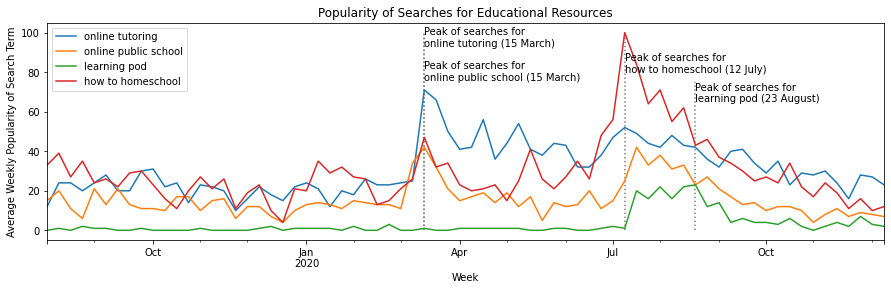

In [10]:
# find maximum search popularity for each term and plot in the graph
online_tutor_max = tutor2_df['online tutoring'].idxmax()
label = online_tutor_max.strftime('%d %B')

homeschool_max = tutor2_df['how to homeschool'].idxmax()
label2 = homeschool_max.strftime('%d %B')

onl_pschl_max = tutor2_df['online public school'].idxmax()
label3 = onl_pschl_max.strftime('%d %B')

learn_pod_max = tutor2_df['learning pod'].idxmax()
label4 = learn_pod_max.strftime('%d %B')

#Plotting graph
tplot = tutor2_df.plot(figsize = (15,4), xlabel='Week', 
                            ylabel='Average Weekly Popularity of Search Term',
                           title='Popularity of Searches for Educational Resources'
                      
                      )

tplot.legend(loc=2)

#Creating lines to show max popularity
tplot.vlines(online_tutor_max, 0, 100, linestyle='dotted', color='gray')
tplot.text(online_tutor_max, 93, f'Peak of searches for\nonline tutoring ({label})')

tplot.vlines(homeschool_max, 0, 100, linestyle='dotted', color='gray')
tplot.text(homeschool_max, 80, f'Peak of searches for\nhow to homeschool ({label2})')

tplot.vlines(onl_pschl_max, 0, 100, linestyle='dotted', color='gray')
tplot.text(onl_pschl_max, 76, f'Peak of searches for\nonline public school ({label3})')

tplot.vlines(learn_pod_max, 0, 75, linestyle='dotted', color='gray')
tplot.text(learn_pod_max, 65, f'Peak of searches for\nlearning pod ({label4})')

#Saving image to folder
tplot.get_figure().savefig('../data_story_presentation/img/google_trends.jpg', 
                                  bbox_inches='tight', dpi=300)

Between March 1 and March 21, searches for "online tutoring," "online public school," and "how to homeschool" showed a sharp increase, and searches for online tutors remained popular for the rest of the Spring 2020 semester.
Interest rose again in early July and throughout August in preparation for the Fall 2020 semester, and people also began searching for more information about "learning pods." Most interestingly, the searches for "how to homeschool" reached peak popularity during the third week of July. It seems parents consider homeschooling just before the start of every school year, and many more people gave thought to it during the pandemic. 

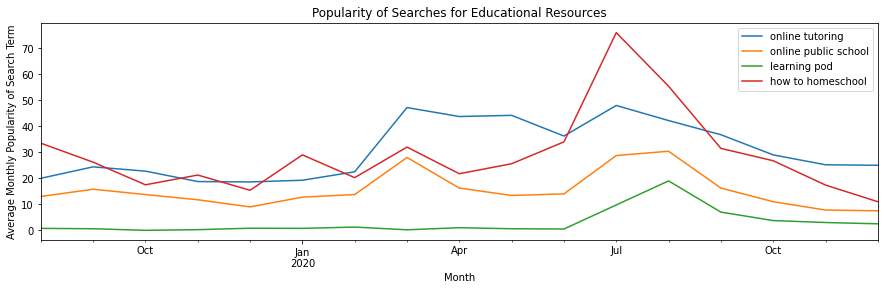

In [11]:
#The MONTHLY average of popularity
tutor_plot_month = tutor2_df.resample('M').mean().plot(figsize = (15,4), xlabel='Month', 
                            ylabel='Average Monthly Popularity of Search Term',
                           title='Popularity of Searches for Educational Resources')
tutor_plot_month.get_figure().savefig('../data_story_presentation/img/google_trends_month.jpg', 
                                  bbox_inches='tight', dpi=300)

## Question 1: Which weeks yielded the highest percentage of searches?

In [12]:
#Maximum popularity of searches per search term
max_search_tutor = max(tutor2_df['online tutoring'])
max_search_public = max(tutor2_df['online public school'])
max_search_pod = max(tutor2_df['learning pod'])
max_search_hs = max(tutor2_df['how to homeschool'])

print(max_search_tutor, max_search_public, max_search_pod, max_search_hs)

71 42 23 100


In [13]:
#Index the week with the peak popularity of searches
# print(tutor2_df.loc[tutor2_df['online tutoring']==max_search_tutor, ])
# print(tutor2_df.loc[tutor2_df['online public school']==max_search_public, ])
# print(tutor2_df.loc[tutor2_df['learning pod']==max_search_pod, ])
print(tutor2_df.loc[tutor2_df['how to homeschool']==max_search_hs, ])


            online tutoring  online public school  learning pod  \
Week                                                              
2020-07-12               52                    25             1   

            how to homeschool  
Week                           
2020-07-12                100  


The term "online public school" saw the most searches the week of March 15, for "online public school," popularity peaked twice: once the week of of March 15, and again on July 19. For "learning pod," peak popularity was the week of August 23, and for "how to homeschool" popularity reached 100 on July 12. This says that at the beginning of the school closures, people immediately started looking for online tutors (when people searched online public school, I think it may have just been for general information about the new format and opposed to actively searching for an online program.) As things got closer to the school year, people wanted to try new learning in place of traditional schooling, so they searched for more information about learning pods and homeschooling.

## Question 2: In which state was each search term most popular?

This requires that I load in the second data frame with the state data (making sure to use the first row as column names and the first columns as indexes like before), and remove the dates from the column names as well.

In [14]:
#Load in the data
map_df =  pd.read_csv('../data/raw/online_tutor_geoMap.csv',
                      skiprows=1,
                      index_col=0)

In [15]:
map_df.head()

,online tutoring: (8/1/19 - 12/18/20),online public schools: (8/1/19 - 12/18/20),learning pod: (8/1/19 - 12/18/20),how to homeschool: (8/1/19 - 12/18/20)
Region,,,,
Oklahoma,15%,58%,NaN,27%
West Virginia,16%,NaN,NaN,84%
Alabama,31%,9%,NaN,60%
Kentucky,23%,24%,NaN,53%
Mississippi,23%,18%,NaN,59%


In [16]:
#Create a mapping dictionary
rename_search2 = {'online tutoring: (8/1/19 - 12/18/20)': 'online tutoring',
                 'online public schools: (8/1/19 - 12/18/20)' : 'online public school',
                 'learning pod: (8/1/19 - 12/18/20)' : 'learning pod',
                 'how to homeschool: (8/1/19 - 12/18/20)' : 'how to homeschool'}
#Renaming the columns
map_df = map_df.rename(columns = rename_search2)
map_df.columns

Index(['online tutoring', 'online public school', 'learning pod',
       'how to homeschool'],
      dtype='object')

Now I want to find the maximum popularity of each term, but with the numerical data in this state, I get an error of the percent signs. For example:

In [17]:
#max(map_df['online tutoring'])

Looking at the data frame info, you can see the numbers are actually reading as strings, so the percent signs must be replaced in order for the data to become an integer variable.

In [18]:
map_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Oklahoma to Wyoming
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   online tutoring       46 non-null     object
 1   online public school  36 non-null     object
 2   learning pod          25 non-null     object
 3   how to homeschool     46 non-null     object
dtypes: object(4)
memory usage: 2.0+ KB


In [19]:
#Replacing the percent signs wih nothing for each search term
map_df['online_tutoring_num'] = map_df['online tutoring'].str.replace('[%<]','').astype(float)
map_df['online_pubschl_num']=map_df['online public school'].str.replace('%','').astype(float)
map_df['learning_pod_num']=map_df['learning pod'].str.replace('[%<]','').astype(float)
map_df['how_homeschool_num']=map_df['how to homeschool'].str.replace('%','').astype(float)

In [20]:
#Dropping the first four columns
cols_to_drop = ['online tutoring', 'online public school', 'learning pod',
       'how to homeschool']
map_df = map_df.drop(columns = cols_to_drop)

In [21]:
#Checking that it worked
map_df.head(10)

,online_tutoring_num,online_pubschl_num,learning_pod_num,how_homeschool_num
Region,,,,
Oklahoma,15.0,58.0,NaN,27.0
West Virginia,16.0,NaN,NaN,84.0
Alabama,31.0,9.0,NaN,60.0
Kentucky,23.0,24.0,NaN,53.0
Mississippi,23.0,18.0,NaN,59.0
Maine,22.0,NaN,NaN,78.0
Arizona,49.0,20.0,1.0,30.0
Idaho,42.0,NaN,NaN,58.0
Maryland,35.0,38.0,2.0,25.0


Next, I will pull the maximum and minimum level of popularity for each search term.

In [22]:
#for 'online tutoring'
print(map_df['online_tutoring_num'].idxmin())
print(map_df['online_tutoring_num'].idxmax())

Nebraska
District of Columbia


In [23]:
#for 'online public school'
print(map_df['online_pubschl_num'].idxmin())
print(map_df['online_pubschl_num'].idxmax())

California
Oklahoma


In [24]:
#for 'learning pod'
print(map_df['learning_pod_num'].idxmin())
print(map_df['learning_pod_num'].idxmax())

Arizona
Pennsylvania


In [25]:
#for 'how to homeschool'
print(map_df['how_homeschool_num'].idxmin())
print(map_df['how_homeschool_num'].idxmax())

Connecticut
Alaska


In 1.5 years, Nebraskan parents searched the most for "online tutoring," Californians for "online public school," Arizonans for "learning pods," and Connecticut parents for "how to homeschool."
On the other hand, parents from DC had the least searches for "online tutoring," Oklahoma for "online public school," Pennsylvanians for "learning pods," and Alaskan parents for "how to homeschool." Search term popularity by state is not consolidated to just one region.